# Overfitting Problem

The overfitting problem happens when a model overfits too much the data available (or the training dataset) and it will most likely fail with unseen data. So let's explore and validate this sentence.

We start by importing the needed libraries (that we already saw in previous lecture), and we will keep using the polynomial data. 

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import os


In [2]:
polynomial_dataset = os.path.join( "data/regression", "polydata.csv")

# read data in pandas frame
poly_df = pd.read_csv(polynomial_dataset, sep = ';') # this file has attributes separated by ;

x = poly_df[['x']]
y = poly_df[['y']]

poly_df.head()

,x,y
0,2.356979,0.532736
1,1.927309,1.110266
2,6.023819,-0.436688
3,5.709137,-0.345190
4,3.749815,-0.496683


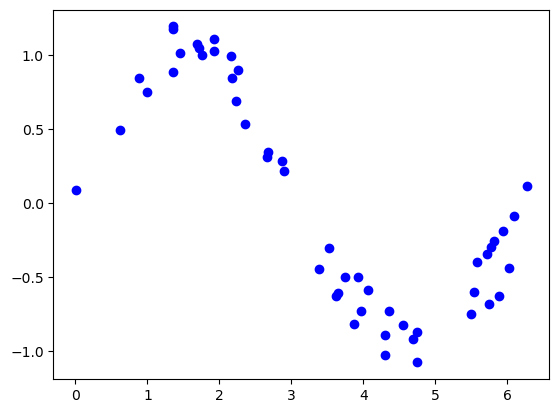

In [3]:
plt.scatter(x, y, c = 'b')

To simulate the unseen data, we are going to split our original dataset into two groups: (i) training dataset; (ii) test set. There is a function in sklearn library that help us splitting the data in this way. 

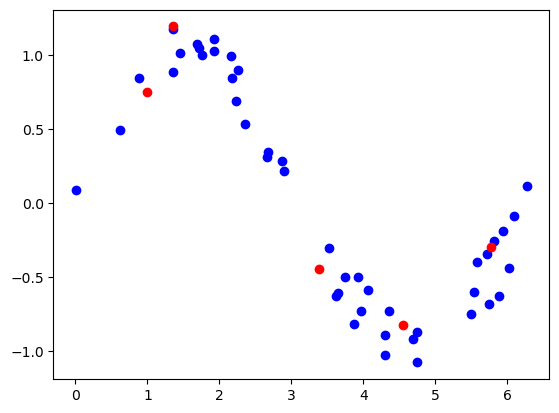

In [4]:
from sklearn.model_selection import train_test_split
seed = 3 

train_set, test_set = train_test_split(poly_df, test_size = 0.1, random_state = seed)

x_train = train_set[['x']]
y_train = train_set[['y']]

x_test = test_set[['x']]
y_test = test_set[['y']]

plt.scatter(x_train, y_train, c = 'b')
plt.scatter(x_test, y_test, c = 'r')
plt.show()


The blue dots are our training dataset and red dots are our test data set.
Now, let's find/train our model using the train dataset and measure the error using the test set. 

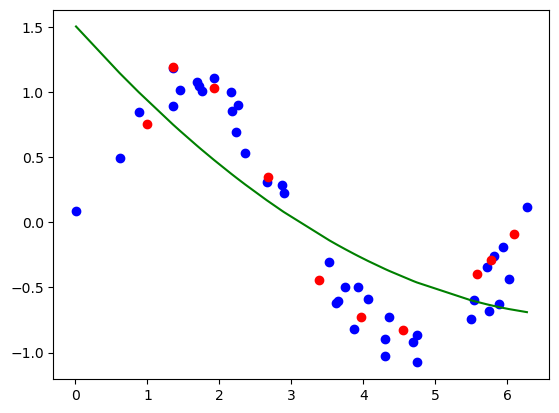

Train Error:  0.2195006856592144
Test Error:  0.1575731471337636


In [5]:
from sklearn.metrics import mean_squared_error

degree = 2
viz = False
polynomial_features = PolynomialFeatures(degree)

# Transform the original input data
poly_trans = polynomial_features.fit_transform(x) # x is our initial variable that has all inputs
#print(poly_trans)
input_df = pd.DataFrame(poly_trans)
input_df['y'] = y # after transformation append the target variable y to the DataFrame df

#input_df.head(4)

# Split the data into train and test set
    # 20% of the original sample(i.e., rows of the DataFrame) will be in the test dataset (Param test_size = 0.3)
train_set, test_set = train_test_split(input_df, test_size = 0.2, random_state = seed)
#print(train_set)

# Order train data by x 
# Just a trick to show properly the polynomial model
train_set = train_set.sort_values(1) 
# Since degree may vary the number of columns as well. Here, we don't want to have the target variable
train_input_df = train_set.iloc[:,0:(len(train_set.columns)-1)] 

y_train = train_set[['y']]


#y_train
test_input_df = test_set.iloc[:,0:(len(test_set.columns)-1)] 
y_test = test_set[['y']]

# Train Model
model = linear_model.LinearRegression()
model.fit(train_input_df, y_train)

# Apply model to Training Set
poly_model = model.predict(train_input_df)

# Apply model to Test Set
poly_pred_test = model.predict(test_input_df)

# Compute square error on train data
error_train = mean_squared_error(y_train, poly_model)

# Compute square error on test data (unseen)
error_test = mean_squared_error(y_test, poly_pred_test)

# Plot train and test set and show the model 
plt.scatter(train_input_df.iloc[:,1], y_train, c = 'b') # train set
plt.scatter(test_input_df.iloc[:,1], y_test, c = 'r') # test set

plt.plot(train_input_df.iloc[:,1],poly_model, color = 'green') #  model
plt.show()
    
print('Train Error: ', error_train)
print('Test Error: ', error_test)    

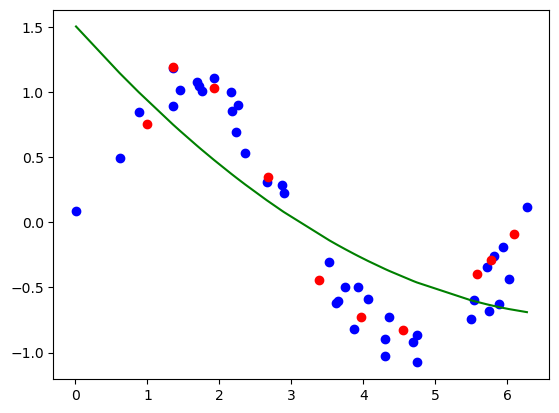

Train Error:  0.2195006856592144
Test Error:  0.1575731471337636


In [6]:
from sklearn.metrics import mean_squared_error

def poly_model(degree, viz):
    polynomial_features = PolynomialFeatures(degree)
    
    # Transform the original input data
    poly_trans = polynomial_features.fit_transform(x) # x is our initial variable that has all inputs
    
    input_df = pd.DataFrame(poly_trans)
    input_df['y'] = y # after transformation append the target variable y to the DataFrame df
    
    # Split the data into train and test set
        # 20% of the original sample(i.e., rows of the DataFrame) will be in the test dataset (Param test_size = 0.3)
    train_set, test_set = train_test_split(input_df, test_size = 0.2, random_state = seed)

    # Order train data by x 
    # Just a trick to show properly the polynomial model
    train_set = train_set.sort_values(1) 
    
    # Since degree may vary the number of columns as well. Here, we don't want to have the target variable
    train_input_df = train_set.iloc[:,0:(len(train_set.columns)-1)] 
    y_train = train_set[['y']]
    
    test_input_df = test_set.iloc[:,0:(len(test_set.columns)-1)] 
    y_test = test_set[['y']]
    
    # Train Model
    model = linear_model.LinearRegression()
    model.fit(train_input_df, y_train)
    
    # Apply model to Training Set
    poly_model = model.predict(train_input_df)
    
    # Apply model to Test Set
    poly_pred_test = model.predict(test_input_df)
    
    # Compute square error on train data
    error_train = mean_squared_error(y_train, poly_model)
    
    # Compute square error on test data (unseen)
    error_test = mean_squared_error(y_test, poly_pred_test)
    
    if viz == True:
    # Plot train and test set and show the model 
        plt.scatter(train_input_df.iloc[:,1], y_train, c = 'b') # train set
        plt.scatter(test_input_df.iloc[:,1], y_test, c = 'r') # test set

        plt.plot(train_input_df.iloc[:,1],poly_model, color = 'green') #  model
        plt.show()
    
    return [error_train, error_test]

[error_train, error_test] = poly_model(2, True)

print('Train Error: ', error_train)
print('Test Error: ', error_test)    

So now that we have a function that give us the error on test set, let's see how this error evolves as we increase the degree of the polynomial model

In [7]:
df = pd.DataFrame({'degree' : range(1, 13 ,1)})
df

,degree
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [8]:

df['train_error'] = df['degree'].apply(lambda x: poly_model(x, False)[0]) # poly_model(x, False)[1] syntax - since our function returns two outputs we want to access the value of the first one
df


,degree,train_error
0,1,0.233346
1,2,0.219501
2,3,0.021131
3,4,0.020861
4,5,0.016852
5,6,0.015337
6,7,0.015324
7,8,0.015276
8,9,0.015008
9,10,0.014404


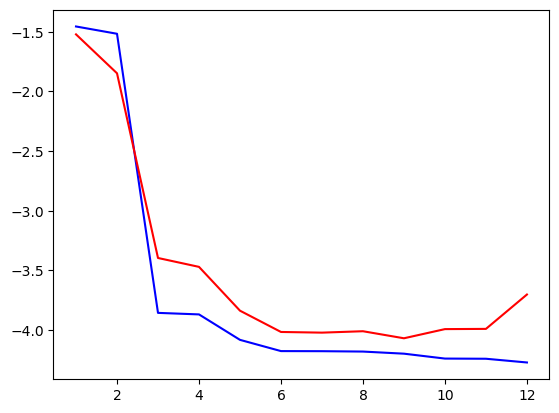

In [9]:
# Creates a new column 'square_error' using poly_model function
df['train_error'] = df['degree'].apply(lambda x: poly_model(x, False)[0]) # poly_model(x, False)[1] syntax - since our function returns two outputs we want to access the value of the first one
df['test_error'] = df['degree'].apply(lambda x: poly_model(x, False)[1]) # poly_model(x, False)[1] syntax - since our function returns two outputs we want to access the value of the second one

df['log_train_error'] = np.log(df['train_error'])
df['log_test_error'] = np.log(df['test_error'])

plt.plot(df['degree'],df['log_train_error'], color = 'blue') 
plt.plot(df['degree'],df['log_test_error'], color = 'red') 
plt.show()
#models = pd.DataFrame(1:13)
#models

Increasing the degree of the polynomial, training error and test error eventually diverge and test error becomes much higher than training error, which means that the model is not handling well with unseen data (test set) because it's too overfitted to the data in training set.

# Model Selection - Selecting the best polynomial degree

Now that we understand the importance of choosing the right model, let's see how to apply k-fold cross-validation to select the best polynomial model.

In [10]:
from sklearn.model_selection import cross_val_score
import sklearn
degree = 2

def trans_data(degree):
    polynomial_features = PolynomialFeatures(degree)
    
    # Transform the original input data
    poly_trans = polynomial_features.fit_transform(x) # x is our initial variable that has all inputs
    input_df = pd.DataFrame(poly_trans)
    return input_df

model = linear_model.LinearRegression()

scores = cross_val_score(model, trans_data(degree), y, scoring='neg_mean_squared_error', cv=10)
# For neg_mean_squared_error check this documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
scores
scores.mean()


-0.2883095223828597

In [11]:
df = pd.DataFrame({'degree' : range(1, 13 ,1)})

df['test_error'] = df['degree'].apply(lambda x: cross_val_score(model, trans_data(x), y, scoring='neg_mean_squared_error', cv=10).mean()) # poly_model(x, False)[1] syntax - since our function returns two outputs we want to access the value of the second one
df.sort_values('test_error', ascending=False) 

,degree,test_error
5,6,-0.019410
2,3,-0.029685
4,5,-0.042651
6,7,-0.047919
3,4,-0.062167
8,9,-0.113871
10,11,-0.210659
0,1,-0.246129
1,2,-0.288310
7,8,-0.440512


## Exercise

For this exercise, we are going to use the Boston house prices dataset available at scikit learn and so we can import it as follows.


In [12]:
from sklearn.datasets import load_boston
load_boston()
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns =  dataset.feature_names)
df.head()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


To learn about the data available type run the following code

In [ ]:
#print(dataset)

Here, we aim the following tasks/questions to be completed:
1. Using the variable LSTAT, compute the best model to predict the prices of the house (target variable) - using k-fold cross validation
2. Plot the curve with the test error for each model trained
3. Plot the data and the best model identified
4. Why LSTAT was chosen and not any other variable?

# Estimating uncertainty of the best model found?

Using k-fold cross validation, the model that had better performance on the test set was the polynomial of degree 6.

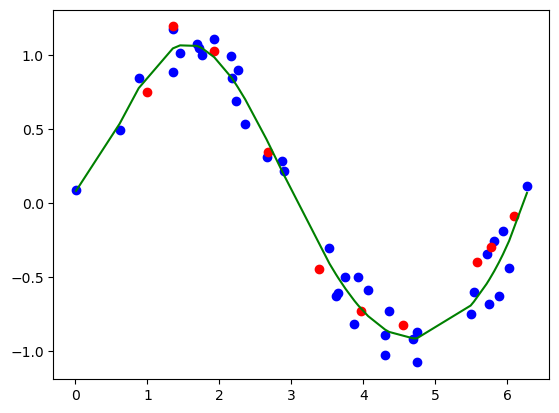

[0.01533698927469932, 0.018004723454240045]

In [13]:
degree = 6;
poly_model(6, True)
#model = linear_model.LinearRegression()

Let's apply the bootstrapping approach to estimate the uncertainty of polynomial of degree 6

In [14]:
len(poly_df)

50

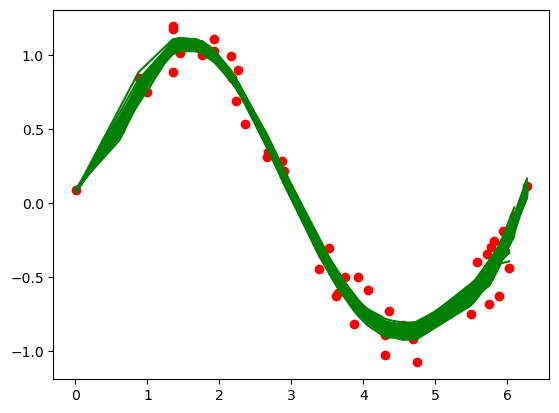

In [15]:
replicas = 100

plt.scatter(x, y, color='red')
df_unc = pd.DataFrame(x)

i = 0;
for _ in range(replicas):

    # fetch a random sample of size 30 from poly_df dataframe. 
    # This corresponds to the first step of bootstrapping approach
    #    Create each replica of N points by picking at random from the original data
    rep_data = poly_df.sample(n=40) 
    rep_data = rep_data.sort_values('x')

    #Use each replica as a different experiment to collect statistics
    
    degree= 6
    polynomial_features = PolynomialFeatures(degree)

    x_poly = polynomial_features.fit_transform(rep_data[['x']])
    model = linear_model.LinearRegression()
    model.fit(x_poly, rep_data[['y']])

    y_poly_unc = model.predict(x_poly)
     
    #print(pd.DataFrame(y_poly_unc, index = rep_data.index))
    df_unc =  pd.concat([df_unc, pd.DataFrame(y_poly_unc, index = rep_data.index)], axis=1)
    df_unc = df_unc.sort_values('x')
    i = i + 1

    plt.plot(rep_data['x'], y_poly_unc, c = 'green')
    

In [16]:
df_unc

,x,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0.007546,0.076396,0.094400,0.084942,0.090196,0.093267,0.087978,0.093161,0.087554,NaN,...,0.098785,0.091872,0.087981,NaN,0.090480,0.086786,0.075582,0.093180,0.091771,0.090558
35,0.612750,0.538863,0.482804,NaN,0.465141,0.471321,0.507081,0.485456,NaN,0.505092,...,0.466549,NaN,0.496816,0.505087,0.490518,0.503335,0.538366,0.451201,0.486114,NaN
32,0.878824,NaN,0.751233,0.887540,NaN,NaN,0.760823,0.744203,0.773969,0.743391,...,0.740163,0.742208,0.763058,0.737228,0.757345,0.760546,0.781496,NaN,0.757667,0.769733
9,0.997850,NaN,0.856335,NaN,0.839473,NaN,0.858510,0.845094,0.867915,0.833180,...,0.847401,0.843890,0.867090,0.828260,0.861453,0.860594,0.872900,0.835427,0.862887,0.865358
31,1.350172,1.065039,1.067240,1.107174,1.051082,NaN,1.050843,NaN,1.056328,NaN,...,NaN,NaN,1.076536,NaN,1.069737,1.061803,1.047101,1.059682,1.069063,1.052341
25,1.351821,1.065483,1.067816,NaN,NaN,1.031893,1.051353,1.047204,1.056847,1.007656,...,1.061162,1.047687,1.077113,1.011698,1.070304,1.062358,1.047536,1.060316,1.069602,1.052830
8,1.355988,1.066589,1.069254,1.108139,NaN,1.033379,1.052624,1.048567,1.058139,NaN,...,1.062582,1.049063,1.078553,NaN,1.071718,1.063744,1.048619,1.061900,1.070942,1.054047
37,1.453347,NaN,1.095419,1.117793,1.079148,1.061248,1.075317,1.073219,1.081739,1.028734,...,1.088021,1.074010,NaN,1.035495,1.097384,1.089126,NaN,NaN,1.094618,1.075543
30,1.684245,1.076555,1.100424,1.092642,NaN,1.074354,1.075475,1.076411,1.086522,1.026896,...,1.089122,NaN,NaN,1.038562,1.101657,1.095483,1.059549,1.102481,NaN,1.073211
49,1.718100,1.069122,1.094558,1.083487,1.077194,1.070072,1.069297,1.070470,1.081226,1.020941,...,NaN,NaN,NaN,1.033129,NaN,1.090157,1.052487,1.097309,NaN,1.066691


/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_98908/2116473011.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unc['median'] = df_unc.quantile(0.5, axis = 1, interpolation = 'midpoint')
/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_98908/2116473011.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unc['p5'] = df_unc.quantile(0.05, axis = 1,interpolation = 'midpoint')
/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_98908/2116473011.py:4: PerformanceWarning: DataFrame is highly frag

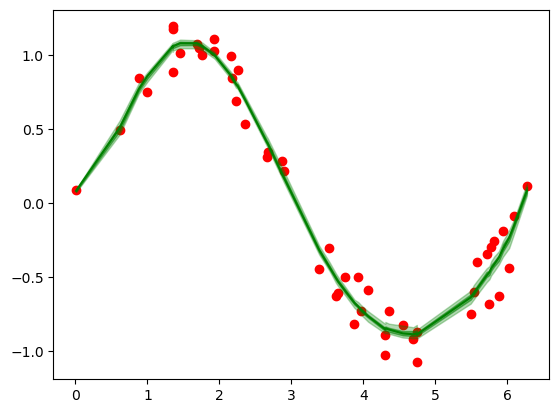

In [17]:
plt.scatter(x, y, color='red')
df_unc['median'] = df_unc.quantile(0.5, axis = 1, interpolation = 'midpoint')
df_unc['p5'] = df_unc.quantile(0.05, axis = 1,interpolation = 'midpoint')
df_unc['p25'] = df_unc.quantile(0.25, axis = 1,interpolation = 'midpoint')
df_unc['p75'] = df_unc.quantile(0.75, axis = 1,interpolation = 'midpoint')
df_unc['p95'] = df_unc.quantile(0.95, axis = 1,interpolation = 'midpoint')

plt.plot(df_unc['x'], df_unc['median'], color = 'green')
plt.fill_between(df_unc[['x']].iloc[:,0], df_unc[['p25']].iloc[:,0], df_unc[['p75']].iloc[:,0], color='green',alpha=0.5)
plt.fill_between(df_unc[['x']].iloc[:,0], df_unc[['p5']].iloc[:,0], df_unc[['p95']].iloc[:,0], color='green',alpha=0.3)


## Exercise

Estimate and plot the uncertainty for the model identified in the previous exercise